<a href="https://colab.research.google.com/github/TeAmP0is0N/Fake-News-Hindi/blob/master/models/MBERT_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import copy
import re
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
pd.options.display.max_colwidth = 0

In [ ]:
#Loading Embedding Features DataFrame

path_temp = r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Data Set/Embeddings Datasets/Multi-Lingual-BERT/mbert_train.pkl"
f = open(path_temp,'rb')
mbert_train = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Data Set/Embeddings Datasets/Multi-Lingual-BERT/mbert_test.pkl"
f = open(path_temp,'rb')
mbert_test = pickle.load(f)
f.close()


In [ ]:
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defmatation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
1,-0.118905,0.228053,-0.107176,0.490232,0.064323,0.193036,-0.115965,0.182197,-0.033830,0.418321,-0.580961,-0.183495,-0.442750,-0.137044,0.832290,-0.011683,-0.100912,-0.162872,-0.248151,-0.105499,-0.078988,-0.184226,-0.190933,-0.587855,0.042618,-0.039224,-0.304879,-0.287771,0.666709,0.312562,0.186880,-0.143464,-0.849030,-0.094588,0.329206,-0.296587,0.136138,0.068638,0.148622,-0.297672,...,0.145548,-0.158586,-0.151615,0.398459,-0.599488,0.199375,-0.031982,-0.467552,-0.098465,-0.052053,-0.002969,-0.518265,-0.011382,0.019811,-0.344297,-0.044616,-0.226941,-0.270408,-0.133766,-0.231164,0.347956,-0.600360,-0.373046,0.087023,-0.074193,-0.570094,-0.411533,0.641706,-0.230593,0.029968,-0.275100,0.135672,-0.620829,-0.085859,0,0,0,0,0,1
2,-0.352412,0.891742,0.370846,0.738691,0.244717,-0.261234,-0.304924,0.394029,0.102821,0.460116,-0.736791,-0.375218,-0.648683,-0.159392,0.425843,-0.108971,-0.279309,-0.227840,0.113636,0.227143,0.124894,0.008834,-0.111008,-0.102820,0.491229,-0.361893,0.189791,0.176033,-0.018359,0.215636,0.016045,-0.338596,-0.092527,-0.432481,-0.098161,-0.020594,-0.055031,-0.048911,-0.039941,-0.622446,...,0.142103,-0.157460,0.423662,-0.005628,-0.131595,0.013594,-0.172776,-0.170781,-0.006833,0.215784,-0.004821,0.238154,0.322642,0.324871,-0.444282,0.642850,-0.339420,-0.227259,-0.107162,-0.267277,0.244657,-0.711058,-0.077447,-0.174185,0.037721,-0.190050,-0.100604,-0.016387,0.237433,-0.327698,0.425320,-0.159900,0.017658,-0.654000,0,0,0,0,0,1
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
4,-0.186740,0.340729,0.133961,0.389023,0.148840,0.123022,0.013151,0.485828,0.156027,0.398113,-0.373687,-0.427570,-0.384739,-0.246714,0.908449,-0.219268,-0.199005,-0.184001,-0.288396,0.089997,0.118162,-0.133072,0.141761,-0.236784,0.477970,0.102205,-0.181945,-0.035385,0.650147,0.087995,0.055624,0.039921,-0.569286,-0.294644,0.009235,-0.301235,-0.122495,0.327218,0.257748,-0.556150,...,0.384445,-0.160819,-0.013044,0.228933,-0.493046,0.064510,-0.408671,-0.749835,-0.096949,0.133533,-0.134637,-0.149993,0.209405,-0.397121,-0.087614,0.210257,-0.381701,-0.422058,-0.116346,-0.185475,0.108368,-0.466941,-0.062735,-0.037566,-0.198277,-0.147195,-0.600615,0.355162,0.012961,0.369998,-0.535832,0.037708,-0.461856,-0.222959,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
mbert_test = copy.deepcopy(mbert_train.iloc[5728:])
mbert_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defmatation,Fake,Hate,Offensive,Non-Hostile
5728,0.146154,0.547867,0.063385,0.704434,0.324381,0.833834,-0.404689,0.602847,0.199473,0.629237,-0.006619,-0.769648,-0.609856,-0.194881,0.641315,-0.377627,-0.484244,-0.457588,-0.041876,-0.494019,-0.176284,0.133694,-0.437161,-0.569604,0.752515,0.278638,-0.179575,0.390398,0.661422,0.454654,-0.225835,-0.433343,-0.269566,-0.264891,0.322374,-0.032127,0.594944,0.576833,-0.206191,-0.276645,...,0.763836,-0.031216,0.360816,-0.740703,0.121272,0.164624,-0.469453,-0.289827,-0.197744,-0.000304,-0.157638,-0.005018,0.114211,1.116369,-0.436943,-0.135787,-0.049272,0.462445,-0.194197,-0.000036,0.470343,-0.504394,0.145645,-0.124713,0.549788,0.157939,-0.634953,0.087418,0.018456,0.132502,0.290918,0.026339,-0.303839,-0.383785,0,0,0,0,0,1
5729,-0.020865,0.457289,0.046067,0.516731,0.546829,0.322691,-0.364778,0.828332,0.087844,0.169251,-1.032804,-0.603617,-0.129805,-0.035126,0.880602,0.380134,-0.522691,-0.280909,-0.087532,-0.484360,0.015131,0.865041,0.092222,-0.188068,-0.285638,-0.479068,0.251447,0.472543,0.791229,0.315534,0.203040,0.004173,0.207115,-0.182723,0.354502,-0.842335,0.190779,0.490406,-1.015756,-0.249433,...,0.102820,1.343572,-0.035489,-0.452084,0.011862,-0.192524,-0.231404,-0.335939,-0.026824,0.159585,-0.038497,0.022071,-0.143784,0.604021,0.133744,-0.081434,-0.308696,-0.097234,-0.347254,0.611380,-0.028486,-0.582309,0.812054,-0.219441,-0.028991,0.243647,-0.414992,0.163650,-0.058626,-0.717886,0.075236,0.044966,-0.421684,-0.392300,1,1,0,0,0,0
5730,0.230976,0.036649,-0.075142,-0.065840,0.146906,0.516475,-0.021493,0.541686,0.101149,-0.120511,-0.467725,-0.444756,-0.281426,-0.098609,0.637130,-0.063365,-0.380275,-0.018878,-0.482018,-0.317568,0.111027,0.225833,-0.054039,-0.424595,0.194544,0.038557,-0.186881,-0.193370,0.591999,0.369952,0.042418,0.026700,-0.466828,-0.187227,0.012854,0.081637,0.241296,0.093436,0.186451,-0.261995,...,0.130383,-0.085573,0.352275,0.158224,-0.092934,-0.096448,-0.012385,-0.334627,0.009309,0.026509,-0.142873,0.142987,0.088554,0.329843,0.381739,-0.086784,-0.178658,-0.062562,-0.267836,0.273469,0.094416,-0.281027,-0.046625,-0.050893,-0.272043,-0.104741,-0.260660,0.087023,0.107649,0.211713,-0.146863,-0.051275,-0.338718,0.225769,0,0,0,0,0,1
5731,-0.067285,0.318646,0.287195,0.429583,0.955036,0.128375,-0.229407,0.483078,-0.309762,0.182423,-0.168166,-0.210630,-0.526781,0.007643,0.693394,0.116122,-0.313474,-0.052754,0.544722,-0.204525,-0.605577,-0.109177,-0.194510,-0.440187,0.190682,-0.341889,-0.295024,0.332466,0.527684,0.529618,-0.005527,0.162179,0.187716,-0.561326,-0.120739,-0.178538,0.113795,0.338779,-0.279709,0.255666,...,0.252021,-0.240705,-0.056583,-0.357401,0.554875,0.010119,0.447929,0.079127,-0.245895,0.590331,0.469499,-0.493029,0.243888,0.259959,0.448458,-0.280845,-0.152394,0.161396,-0.179084,0.181374,-0.058510,0.040826,-0.280462,-0.313203,-0.448469,-0.003820,-0.473894,-0.233364,0.345859,-0.492485,-0.475212,-0.166962,-0.428719,-0.124557,0,0,0,0,0,1
5732,-0.005713,0.370628,0.074260,0.224970,0.196585,0.557196,0.193560,0.302086,0.263122,0.114698,-0.727378,-0.409346,-0.259106,-0.030030,0.224294,0.091040,-0.221557,0.098222,-0.091383,-0.433689,0.165605,-0.140828,0.011527,-0.424334,0.337225,0.174716,0.145304,-0.033985,0.538006,0.105201,0.221713,-0.253962,-0.165644,-0.385971,-0.146430,-0.045834,0.085191,0.109826,0.248408,-0.380577,...,0.184876,-0.049601,0.328135,0.057756,-0.364830,0.260973,0.145899,-0.549393,0.010121,0.209491,-0.065839,-0.003389,0.371818,0.163327,-0.026481,0.117203,-0.531748,-0.239056,-0.177844,-0.107374,0.135009,-0.086531,-0.114612,-0.092102,0.291820,-0.284852,-0.297935,0.035257,0.155845,0.418267,-0.401720,-0.039830,0.097472,-0.251344,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
mbert_train = mbert_train[:5728]
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defmatation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
1,-0.118905,0.228053,-0.107176,0.490232,0.064323,0.193036,-0.115965,0.182197,-0.033830,0.418321,-0.580961,-0.183495,-0.442750,-0.137044,0.832290,-0.011683,-0.100912,-0.162872,-0.248151,-0.105499,-0.078988,-0.184226,-0.190933,-0.587855,0.042618,-0.039224,-0.304879,-0.287771,0.666709,0.312562,0.186880,-0.143464,-0.849030,-0.094588,0.329206,-0.296587,0.136138,0.068638,0.148622,-0.297672,...,0.145548,-0.158586,-0.151615,0.398459,-0.599488,0.199375,-0.031982,-0.467552,-0.098465,-0.052053,-0.002969,-0.518265,-0.011382,0.019811,-0.344297,-0.044616,-0.226941,-0.270408,-0.133766,-0.231164,0.347956,-0.600360,-0.373046,0.087023,-0.074193,-0.570094,-0.411533,0.641706,-0.230593,0.029968,-0.275100,0.135672,-0.620829,-0.085859,0,0,0,0,0,1
2,-0.352412,0.891742,0.370846,0.738691,0.244717,-0.261234,-0.304924,0.394029,0.102821,0.460116,-0.736791,-0.375218,-0.648683,-0.159392,0.425843,-0.108971,-0.279309,-0.227840,0.113636,0.227143,0.124894,0.008834,-0.111008,-0.102820,0.491229,-0.361893,0.189791,0.176033,-0.018359,0.215636,0.016045,-0.338596,-0.092527,-0.432481,-0.098161,-0.020594,-0.055031,-0.048911,-0.039941,-0.622446,...,0.142103,-0.157460,0.423662,-0.005628,-0.131595,0.013594,-0.172776,-0.170781,-0.006833,0.215784,-0.004821,0.238154,0.322642,0.324871,-0.444282,0.642850,-0.339420,-0.227259,-0.107162,-0.267277,0.244657,-0.711058,-0.077447,-0.174185,0.037721,-0.190050,-0.100604,-0.016387,0.237433,-0.327698,0.425320,-0.159900,0.017658,-0.654000,0,0,0,0,0,1
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
4,-0.186740,0.340729,0.133961,0.389023,0.148840,0.123022,0.013151,0.485828,0.156027,0.398113,-0.373687,-0.427570,-0.384739,-0.246714,0.908449,-0.219268,-0.199005,-0.184001,-0.288396,0.089997,0.118162,-0.133072,0.141761,-0.236784,0.477970,0.102205,-0.181945,-0.035385,0.650147,0.087995,0.055624,0.039921,-0.569286,-0.294644,0.009235,-0.301235,-0.122495,0.327218,0.257748,-0.556150,...,0.384445,-0.160819,-0.013044,0.228933,-0.493046,0.064510,-0.408671,-0.749835,-0.096949,0.133533,-0.134637,-0.149993,0.209405,-0.397121,-0.087614,0.210257,-0.381701,-0.422058,-0.116346,-0.185475,0.108368,-0.466941,-0.062735,-0.037566,-0.198277,-0.147195,-0.600615,0.355162,0.012961,0.369998,-0.535832,0.037708,-0.461856,-0.222959,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Sklearn MultiLabel KNN

In [ ]:
mbert_train = np.asarray(mbert_train)
mbert_test  = np.asarray(mbert_test)

x_train = mbert_train[:,:-6]
y_train = mbert_train[:,-5:]

x_test  = mbert_test[:,:-6]
y_test  = mbert_test[:,-5:]


print("x_train: ",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train:  (5728, 768)
y_train (5728, 5)
x_test (811, 768)
y_test (811, 5)


In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.7MB/s 


In [ ]:
from skmultilearn.adapt import MLkNN 

mlknn_classifier = MLkNN() 
mlknn_classifier.fit(x_train,y_train) 


MLkNN(ignore_first_neighbours=0, k=10, s=1.0)

In [ ]:
y_pred = mlknn_classifier.predict(x_test) 
print(y_pred.toarray())

[[0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]]


In [ ]:
y_pred.shape

(811, 5)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


r  = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')

p  = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')

f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print(f1)
# print(p)
# print(r)

# print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.4980363346159853
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        77
           1       0.42      0.24      0.30       160
           2       0.39      0.11      0.17       110
           3       0.35      0.14      0.20       103
           4       0.81      0.80      0.80       435

   micro avg       0.69      0.47      0.56       885
   macro avg       0.44      0.26      0.30       885
weighted avg       0.58      0.47      0.50       885
 samples avg       0.50      0.50      0.50       885



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)

[[[728   6]
  [ 75   2]]

 [[599  52]
  [122  38]]

 [[682  19]
  [ 98  12]]

 [[682  26]
  [ 89  14]]

 [[293  83]
  [ 87 348]]]


In [ ]:
# cm = metrics.confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,6))
# # xticklabels = ['Non-Hostile', 'Hostile']
# # yticklabels = ['Non-Hostile', 'Hostile']
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues')#,xticklabels=xticklabels, yticklabels=yticklabels)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

#Coarse Grained Models


In [ ]:
hostility_x_train = mbert_train[:,:-6]
hostility_y_train = mbert_train[:,-6]

hostility_x_test = mbert_test[:,:-6]
hostility_y_test = mbert_test[:,-6]

print("hostile_x_train: ",hostility_x_train.shape)
print("hostile_y_train",hostility_y_train.shape)
print("hostile_x_test",hostility_x_test.shape)
print("hostile_y_test",hostility_y_test.shape)

hostile_x_train:  (5728, 768)
hostile_y_train (5728,)
hostile_x_test (811, 768)
hostile_y_test (811,)


## SVM for Hostility Prediction

In [ ]:
hostility_y_train[:10]

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [ ]:
# param_grid = {'C': [0.01, 0.1, 1, 10],
#               'gamma': [1,0.1],
#               'kernel': ['rbf','linear']}


# grid = GridSearchCV(SVC(),param_grid,verbose=10)
# grid.fit(x_train,y_train)
# print(grid.best_params_)

In [ ]:
hostility_clf = SVC(kernel='linear',C=0.01,gamma=1,verbose=True) ### Earlier C=1, gamma=0.01 gave 76% accuracy
hostility_clf.fit(hostility_x_train,hostility_y_train)

[LibSVM]

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [ ]:
#Dumping the SVM Model
joblib.dump(hostility_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/SVM MBERT Models/hostility_clf.pkl")
hostility_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/SVM MBERT Models/hostility_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = hostility_clf.predict(hostility_x_test)
print(classification_report(predict_test,hostility_y_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=hostility_y_test, y_pred=predict_test, average='weighted')
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       418
         1.0       0.85      0.81      0.83       393

    accuracy                           0.84       811
   macro avg       0.84      0.84      0.84       811
weighted avg       0.84      0.84      0.84       811

(array([0., 1.]), array([418, 393]))
0.8411102523943486


Text(0.5, 62.15999999999998, 'Predicted label')

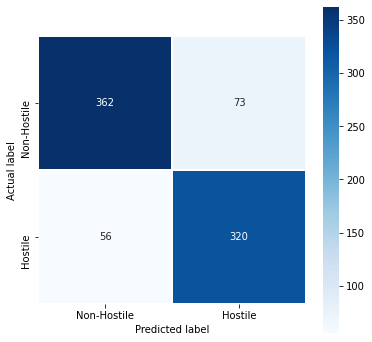

In [ ]:
cm = metrics.confusion_matrix(hostility_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Hostile', 'Hostile']
yticklabels = ['Non-Hostile', 'Hostile']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Random Forest Classifier

In [ ]:
#Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
hostility_clf = RandomForestClassifier(n_estimators=400).fit(hostility_x_train, hostility_y_train)

In [ ]:
#Dumping the Random Forest Model
joblib.dump(hostility_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/RF MBERT Models/hostility_clf.pkl")
hostility_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/RF MBERT Models/hostility_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = hostility_clf.predict(hostility_x_test)
print(classification_report(predict_test,hostility_y_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=hostility_y_test, y_pred=predict_test, average='weighted')
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       425
         1.0       0.80      0.77      0.78       386

    accuracy                           0.80       811
   macro avg       0.80      0.80      0.80       811
weighted avg       0.80      0.80      0.80       811

(array([0., 1.]), array([425, 386]))
0.7979317227046502


Text(0.5, 62.15999999999998, 'Predicted label')

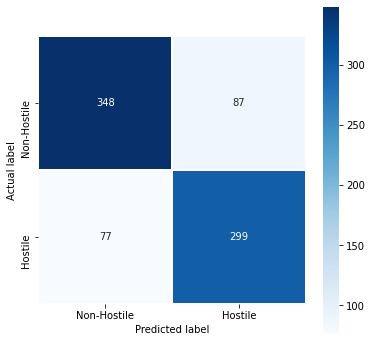

In [ ]:
cm = metrics.confusion_matrix(hostility_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Hostile', 'Hostile']
yticklabels = ['Non-Hostile', 'Hostile']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

### 768 --> 100 --> 10 --> 2

hostility_clf= MLPClassifier(hidden_layer_sizes = (100,10),activation='relu',max_iter=10000)
hostility_clf.fit(hostility_x_train,hostility_y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Dumping the Random Forest Model
joblib.dump(hostility_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/MLP MBERT Models/hostility_clf.pkl")
hostility_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/MLP MBERT Models/hostility_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = hostility_clf.predict(hostility_x_test)
print(classification_report(predict_test,hostility_y_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=hostility_y_test, y_pred=predict_test, average='weighted')
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       445
         1.0       0.81      0.83      0.82       366

    accuracy                           0.83       811
   macro avg       0.83      0.83      0.83       811
weighted avg       0.84      0.83      0.83       811

(array([0., 1.]), array([445, 366]))
0.8345972856680578


Text(0.5, 62.15999999999998, 'Predicted label')

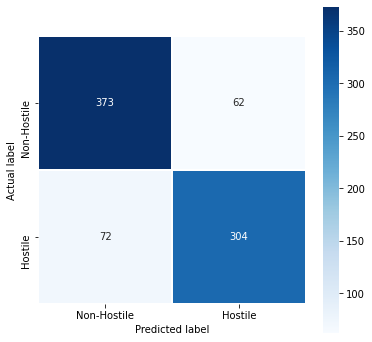

In [ ]:
cm = metrics.confusion_matrix(hostility_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Hostile', 'Hostile']
yticklabels = ['Non-Hostile', 'Hostile']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
hostility_clf = 0
hostility_clf = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000).fit(hostility_x_train, hostility_y_train)

In [ ]:
#Dumping the Random Forest Model
joblib.dump(hostility_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/LR MBERT Models/hostility_clf.pkl")
hostility_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/LR MBERT Models/hostility_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = hostility_clf.predict(hostility_x_test)
print(classification_report(predict_test,hostility_y_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=hostility_y_test, y_pred=predict_test, average='weighted')
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       427
         1.0       0.84      0.82      0.83       384

    accuracy                           0.84       811
   macro avg       0.84      0.84      0.84       811
weighted avg       0.84      0.84      0.84       811

(array([0., 1.]), array([427, 384]))
0.8398038992188099


Text(0.5, 62.15999999999998, 'Predicted label')

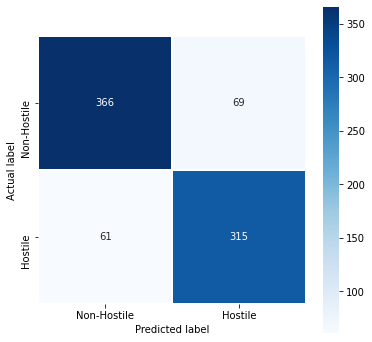

In [ ]:
cm = metrics.confusion_matrix(hostility_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-Hostile', 'Hostile']
yticklabels = ['Non-Hostile', 'Hostile']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')